In [1]:
import pandas as pd
import numpy as np


## Unbalanced Data

In [2]:
#Select feature to predict on

feature = 'average_rating_count'
data_1_2_3 = 3

In [3]:
#Choosing file path


if data_1_2_3 ==1:
    file_location = 'D:\\Victor Yotov\\ITU\\3rd Semester\\Research Project\\data\\Directors_Dataset\\1_Director_Data_Mar-21-2020.csv'
elif data_1_2_3 == 2:
    file_location = 'D:\\Victor Yotov\\ITU\\3rd Semester\\Research Project\\data\\Directors_Dataset\\2_Director_Data_Enhanced_May-10-2020.csv'
elif data_1_2_3 == 3:
    file_location = 'D:\\Victor Yotov\\ITU\\3rd Semester\\Research Project\\data\\Directors_Dataset\\3_USA_Director_Specific_dataset_May-15-2020.csv'
else:
    raise ValueError('Wrong INTEGER provided.') 
    
data = pd.read_csv(file_location)

data.shape

(1215, 56)

In [4]:
file_location

'D:\\Victor Yotov\\ITU\\3rd Semester\\Research Project\\data\\Directors_Dataset\\3_USA_Director_Specific_dataset_May-15-2020.csv'

In [5]:
data.head(5)

,director_ids,director_name,average_rating_value,average_rating_count,movies_produced,career_Length,CareerStartYear,Gender,birthYear,median_inter_event_time,...,total_genre_Romance,total_genre_Sci_Fi,total_genre_Short,total_genre_Sport,total_genre_Talk_Show,total_genre_Thriller,total_genre_War,total_genre_Western,average_movie_per_year,num_genres_directed
0,nm0000040,Stanley Kubrick,7.30,231646.00,1,49,1951,Male,1928,0.0,...,0,0,0,0,0,1,0,0,0.02,3
1,nm0000095,Woody Allen,6.91,64233.13,15,51,1966,Male,1935,1.0,...,8,0,0,0,0,1,0,0,0.29,7
2,nm0000104,Antonio Banderas,6.30,5964.00,1,1,1999,Male,1960,0.0,...,0,0,0,0,0,0,0,0,1.00,3
3,nm0000106,Drew Barrymore,6.90,56419.00,1,6,2004,Male,1975,0.0,...,0,0,0,1,0,0,0,0,0.17,2
4,nm0000108,Luc Besson,6.30,89739.00,1,33,1981,Male,1959,0.0,...,0,0,0,0,0,1,0,0,0.03,3


In [6]:
### Coold code

# # Quartile cut into 4 different buckets

# cutIntoQuartiles = pd.qcut(data['rating_value'].to_list(), q=4)

# # # Print the quartile range for visuals
# # print(cutIntoQuartiles.categories)

# # # Rename the categories to poor , average,  good , excellent
# # cutIntoQuartiles.categories = ['poor','average','good','excellent']

# # # Add the data to the dataframe
# # movies_data['calc_score'] = cutIntoQuartiles

In [7]:
def quantile_feature(data, string):
    q1 = data[string].quantile(.25)
    q2 = data[string].quantile(.50)
    q3 = data[string].quantile(.75)
    q4 =  data[string].quantile(1)
    
    
#     q1 = (data.loc[:,string].quantile(.25))
#     q2 = (data.loc[:,string].quantile(.50))
#     q3 = (data.loc[:,string].quantile(.75))
#     q4 = (data.loc[:,string].quantile(1))
    return q1, q2, q3, q4


def success_measure_chained(score):
    
    if score >= 0 and score <= q1:
        return 'Terrible'
    elif score >q1 and score <=q2:
        return 'Poor'
    elif score >q2 and score <= q3:
        return 'Average'
    elif score > q3 and score <=q4:
        return 'Excellent'
    else:
        return 'Error_Score' 
    
    
def create_Movie_class(df,feature_name):
    feature = feature_name
#     q1,q2,q3,q4 = quantile_feature(df,feature_name)
    df['Movie_class'] = df[feature].apply(success_measure_chained)
    
    return df

In [8]:
def dummy_male(string):
    if string =='Male':
        return 1
    else:
        return 0
    
    
    
def dummy_female(string):
    if string =='Female':
        return 1
    else:
        return 0
    

    

In [9]:
#If 1 ---- MovieDataset 1
if data_1_2_3 == 1:
     data = data.drop(columns=['director_ids', 'director_name','primaryProfession', 'knownForTitles'])
    
elif data_1_2_3 == 2 or data_1_2_3 ==3:
    data = data.drop(columns=['director_ids', 'director_name'])

    
# data.drop(columns=['director_ids', 'director_names','movie_id','title','primaryProfession', 'knownForTitles','date_published', 'release_date'],inplace=True)
# data = data.drop(columns=['director_ids', 'director_names', 'movie_id', 'title',
#        'release_date', 'Film', 'Name'])

In [10]:
# feature = 'rating_value'
q1,q2,q3,q4 = quantile_feature(data,feature)
data = create_Movie_class(data,feature)

        
data['Gender_MALE'] = data.Gender.apply(dummy_male)
data['Gender_FEMALE'] = data.Gender.apply(dummy_female)




In [11]:
data['Movie_class'].value_counts()

Poor         304
Excellent    304
Terrible     304
Average      303
Name: Movie_class, dtype: int64

In [12]:
# data.review_count_user = data.review_count_user.astype(int)
# data.review_count_critic = data.review_count_critic.astype(int)
# data.rating_value = data.rating_value.astype(float)
# data.rating_count = data.rating_count.astype(int)
# data.movie_year = data.movie_year.astype(int)
# data.birthYear = data.birthYear.astype(int)


# if data_1_2_3 == 2 or data_1_2_3 ==3:
#     data.metascore = data.metascore.astype(int)

In [13]:
data.drop(columns=[feature,'Gender'],inplace=True)

In [14]:
# for i in data.columns.values:
#     print(i)

In [15]:
# data.Gender = data.Gender.map({'Male': 1, 'Female':0})

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from string import ascii_uppercase
import seaborn as sn

def report_accuracy_RF(dataframe, predicted_feature, numberEstimators=100):
    #Splitting X and y
    X = dataframe[dataframe.columns.difference([predicted_feature],sort=False)]
    y = dataframe[predicted_feature]
    
    #Initialize Random Forest
    rnd_forest = RandomForestClassifier(n_estimators=numberEstimators, class_weight='balanced')

#     rnd_forest = RandomForestClassifier(n_estimators=numberEstimators, class_weight='balanced', oob_score=True)
#     rnd_forest = RandomForestClassifier(n_estimators=numberEstimators, oob_score=True)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
    
    rnd_forest.fit(X_train,y_train.values.ravel())
    score = rnd_forest.score(X_test,y_test)
    
    return score, rnd_forest,X, y ,X_train, X_test, y_train, y_test
    

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [18]:
def create_cnf_matrix(y_test, X_test, model):
    
    y_true = y_test.copy()
    y_predict = model.predict(X_test)
    
### C_0_0 = TP - male being classified as a male
### C_0_1 = Males being identified as femals
### C_1_0 = Female being identified as male
### C_1_1 = TN female identified as female  

    #define the order of classes appearing in the matrix
    labels = ['Terrible','Poor','Average','Excellent']
    cnf_matrix = confusion_matrix(y_true, y_predict,  labels=labels)
    
    return cnf_matrix
    

In [19]:
def calculate_confusion_matrix_metrics(confusion_matrix):
    #source:
    #https://stackoverflow.com/questions/50666091/true-positive-rate-and-false-positive-rate-tpr-fpr-for-multi-class-data-in-py
    
    FP = confusion_matrix.sum(axis=0) - np.diag(confusion_matrix)  
    FN = confusion_matrix.sum(axis=1) - np.diag(confusion_matrix)
    TP = np.diag(confusion_matrix)
    TN = confusion_matrix.sum() - (FP + FN + TP)

    FP = FP.astype(float)
    FN = FN.astype(float)
    TP = TP.astype(float)
    TN = TN.astype(float)
    
    return TN, FP, FN, TP

In [20]:
def print_accuracy_feature_importance(score, X, model):
    
    print(f'The accuracy of the model is equal to {round(score * 100,2)} %')
    print()
    print(X.columns)
    print()
    print(model.feature_importances_)
    

In [21]:
def customized_classification_report(y_true,y_pred, AUCROC ):
    cols_to_use_classification_report = ['Terrible','Poor','Average','Excellent','accuracy']
    reportGBClassification = classification_report(y_true,
                                                   y_pred,
                                                   labels = cols_to_use_classification_report[:-1],
                                                   output_dict=True)
    
    reportDF = pd.DataFrame(reportGBClassification, columns = cols_to_use_classification_report)[0:3]#.round(2)
    
    accuracyRow = reportDF['accuracy'].unique().tolist()
    
    reportDF.drop(columns='accuracy',inplace= True)

    reportDF.loc[len(reportDF)] = 4 * accuracyRow
    reportDF.loc[len(reportDF)] = 4 * [AUCROC]  #[round(AUCROC,2)]

    reportDF = reportDF.rename(index = {3:'accuracy',4:'AUC ROC'})
    return reportDF

In [22]:
score, rnd_forest,X, y ,X_train, X_test, y_train, y_test = report_accuracy_RF(data,"Movie_class")
print_accuracy_feature_importance(score,X, rnd_forest)
# print("===============================================\n")
# print()
# cnf_matrix = create_cnf_matrix(y_test,X_test,rnd_forest)
# print(cnf_matrix)
# print("===============================================\n")
# TN, FP, FN, TP = calculate_confusion_matrix_metrics(cnf_matrix)
# print('TN = ',TN)
# print('FP = ',FP)
# print('FN = ',FN)
# print('TP = ',TP)

The accuracy of the model is equal to 66.26 %

Index(['average_rating_value', 'movies_produced', 'career_Length',
       'CareerStartYear', 'birthYear', 'median_inter_event_time',
       'average_inter_event_time', 'total_review_count_user',
       'total_review_count_critic', 'total_metascore', 'median_metascore',
       'total_awards_won', 'total_awards_nominated', 'total_gross_value',
       'total_budget_value', 'average_runtime_of_movie',
       'director_profession_primary', 'director_profession_secondary',
       'director_profession_tertiary', 'director_known_titles_count',
       'director_known_titles_average_rating_value', 'total_genre_Action',
       'total_genre_Adult', 'total_genre_Adventure', 'total_genre_Animation',
       'total_genre_Biography', 'total_genre_Comedy', 'total_genre_Crime',
       'total_genre_Documentary', 'total_genre_Drama', 'total_genre_Family',
       'total_genre_Fantasy', 'total_genre_Film_Noir', 'total_genre_Game_Show',
       'total_genre_Histor

Confusion matrix, without normalization
[[48 12  1  0]
 [ 9 33 18  1]
 [ 0 13 35 12]
 [ 0  1 15 45]]


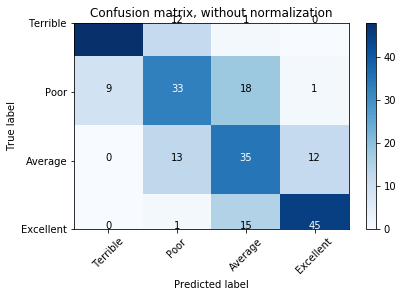

In [23]:
y_predict= rnd_forest.predict(X_test)

cnf_matrix = confusion_matrix(y_test, y_predict,labels=['Terrible','Poor','Average','Excellent'])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Terrible','Poor','Average','Excellent'],
                      title='Confusion matrix, without normalization')

In [24]:
from sklearn.metrics import classification_report


print(classification_report(y_test,y_predict,labels=['Terrible','Poor','Average','Excellent']))

              precision    recall  f1-score   support

    Terrible       0.84      0.79      0.81        61
        Poor       0.56      0.54      0.55        61
     Average       0.51      0.58      0.54        60
   Excellent       0.78      0.74      0.76        61

    accuracy                           0.66       243
   macro avg       0.67      0.66      0.67       243
weighted avg       0.67      0.66      0.67       243



In [25]:
from sklearn.metrics import roc_auc_score


y_prob = rnd_forest.predict_proba(X_test)
ovo_macro_roc_auc = roc_auc_score(y_test, y_prob, average="macro", multi_class = "ovo")
print( "\nArea Under the Curve - ROC (OVO , Macro) : ",round(ovo_macro_roc_auc,3))


Area Under the Curve - ROC (OVO , Macro) :  0.889


In [26]:
rnd_forest

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [27]:
customized_classification_report(y_test,y_predict, ovo_macro_roc_auc )

,Terrible,Poor,Average,Excellent
precision,0.842105,0.559322,0.507246,0.775862
recall,0.786885,0.540984,0.583333,0.737705
f1-score,0.813559,0.550000,0.542636,0.756303
accuracy,0.662551,0.662551,0.662551,0.662551
AUC ROC,0.888953,0.888953,0.888953,0.888953


In [28]:
data.shape

(1215, 55)

### Unbalanced Without Gender

In [29]:
data2 = data.copy()


data2.drop(columns =['Gender_MALE','Gender_FEMALE'],inplace=True)

In [30]:
data2.shape

(1215, 53)

In [31]:
score2, rnd_forest2,X2, y2 ,X_train2, X_test2, y_train2, y_test2 = report_accuracy_RF(data2,"Movie_class")
print_accuracy_feature_importance(score2,X2, rnd_forest2)
# print("===============================================\n")
# print()
# cnf_matrix2 = create_cnf_matrix(y_test2,X_test2,rnd_forest2)
# print(cnf_matrix2)
# print("===============================================\n")
# TN2, FP2, FN2, TP2 = calculate_confusion_matrix_metrics(cnf_matrix2)
# print('TN = ',TN2)
# print('FP = ',FP2)
# print('FN = ',FN2)
# print('TP = ',TP2)

The accuracy of the model is equal to 64.2 %

Index(['average_rating_value', 'movies_produced', 'career_Length',
       'CareerStartYear', 'birthYear', 'median_inter_event_time',
       'average_inter_event_time', 'total_review_count_user',
       'total_review_count_critic', 'total_metascore', 'median_metascore',
       'total_awards_won', 'total_awards_nominated', 'total_gross_value',
       'total_budget_value', 'average_runtime_of_movie',
       'director_profession_primary', 'director_profession_secondary',
       'director_profession_tertiary', 'director_known_titles_count',
       'director_known_titles_average_rating_value', 'total_genre_Action',
       'total_genre_Adult', 'total_genre_Adventure', 'total_genre_Animation',
       'total_genre_Biography', 'total_genre_Comedy', 'total_genre_Crime',
       'total_genre_Documentary', 'total_genre_Drama', 'total_genre_Family',
       'total_genre_Fantasy', 'total_genre_Film_Noir', 'total_genre_Game_Show',
       'total_genre_History

Confusion matrix, without normalization
[[47 14  0  0]
 [10 28 21  2]
 [ 0 12 37 11]
 [ 0  1 16 44]]


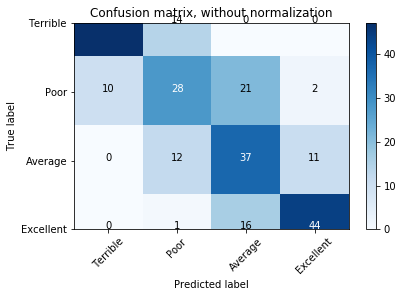

In [32]:

y_predict2= rnd_forest2.predict(X_test2)

cnf_matrix = confusion_matrix(y_test2, y_predict2,labels=['Terrible','Poor','Average','Excellent'])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Terrible','Poor','Average','Excellent'],
                      title='Confusion matrix, without normalization')

In [33]:



print(classification_report(y_test2,y_predict2,labels=['Terrible','Poor','Average','Excellent']))

              precision    recall  f1-score   support

    Terrible       0.82      0.77      0.80        61
        Poor       0.51      0.46      0.48        61
     Average       0.50      0.62      0.55        60
   Excellent       0.77      0.72      0.75        61

    accuracy                           0.64       243
   macro avg       0.65      0.64      0.64       243
weighted avg       0.65      0.64      0.64       243



In [34]:
from sklearn.metrics import roc_auc_score


y_prob2 = rnd_forest2.predict_proba(X_test2)
ovo_macro_roc_auc2 = roc_auc_score(y_test2, y_prob2, average="macro", multi_class = "ovo")
print( "\nArea Under the Curve - ROC (OVO , Macro) : ",round(ovo_macro_roc_auc2,3))


Area Under the Curve - ROC (OVO , Macro) :  0.883


In [35]:
rnd_forest2

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [36]:
customized_classification_report(y_test2,y_predict2, ovo_macro_roc_auc2)

,Terrible,Poor,Average,Excellent
precision,0.824561,0.509091,0.500000,0.771930
recall,0.770492,0.459016,0.616667,0.721311
f1-score,0.796610,0.482759,0.552239,0.745763
accuracy,0.641975,0.641975,0.641975,0.641975
AUC ROC,0.883322,0.883322,0.883322,0.883322


### Balanced on Gender

In [37]:
data3 = pd.read_csv(file_location)

In [38]:
def balance_gender(dataframe):
    female_list_unique_directors = dataframe[(dataframe['Gender'] == 'Female')].director_ids.unique().tolist()
    
    unique_male_directors = dataframe[(dataframe['Gender'] == 'Male')].director_ids.unique().tolist()
    
    male_list_unique_directors = list(np.random.choice(unique_male_directors, replace = False, size = len(female_list_unique_directors)))
    
    total_list_unique_directors = female_list_unique_directors + male_list_unique_directors

    dataframe = dataframe[dataframe['director_ids'].isin(total_list_unique_directors)]

    return dataframe

In [39]:
data3.Gender.value_counts()

Male      1038
Female     177
Name: Gender, dtype: int64

In [40]:
balanced_data = balance_gender(data3)

if data_1_2_3 == 1:
    
    balanced_data=  balanced_data.drop(columns=['director_ids', 'director_name','primaryProfession', 'knownForTitles'])
    
elif data_1_2_3 == 2 or data_1_2_3 ==3:
    balanced_data = balanced_data.drop(columns=['director_ids', 'director_name'])



In [41]:
balanced_data.shape

(354, 54)

In [42]:
balanced_data.Gender.value_counts()

Female    177
Male      177
Name: Gender, dtype: int64

In [43]:
q1,q2,q3,q4 = quantile_feature(balanced_data,feature)
balanced_data = create_Movie_class(balanced_data,feature)

balanced_data['Gender_MALE'] = balanced_data.Gender.apply(dummy_male)
balanced_data['Gender_FEMALE'] = balanced_data.Gender.apply(dummy_female)


balanced_data = balanced_data.drop(columns=[feature,'Gender'])

In [44]:
balanced_data['Movie_class'].value_counts()

Excellent    89
Terrible     89
Poor         88
Average      88
Name: Movie_class, dtype: int64

In [45]:
balanced_data

,average_rating_value,movies_produced,career_Length,CareerStartYear,birthYear,median_inter_event_time,average_inter_event_time,total_review_count_user,total_review_count_critic,total_metascore,...,total_genre_Sport,total_genre_Talk_Show,total_genre_Thriller,total_genre_War,total_genre_Western,average_movie_per_year,num_genres_directed,Movie_class,Gender_MALE,Gender_FEMALE
7,7.30,2,26,1978,1954,6.0,6.00,2583,386,141,...,0,0,0,0,0,0.08,4,Excellent,0,1
13,7.10,1,13,2002,1964,0.0,0.00,190,185,50,...,0,0,0,1,0,0.08,2,Average,0,1
14,6.70,1,14,1993,1943,0.0,0.00,482,195,61,...,0,0,1,0,0,0.07,3,Average,1,0
16,7.22,16,46,1971,1930,1.0,1.27,7198,4142,1121,...,2,0,7,3,0,0.35,14,Excellent,1,0
18,7.83,3,26,1991,1956,6.0,6.00,4023,854,186,...,0,0,1,1,0,0.12,6,Excellent,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1199,6.30,1,5,2006,1986,0.0,0.00,36,112,72,...,0,0,0,0,0,0.20,3,Terrible,0,1
1201,7.20,1,10,1999,1964,0.0,0.00,94,181,82,...,0,0,0,0,0,0.10,2,Poor,0,1
1205,7.00,1,4,2010,1974,0.0,0.00,898,544,54,...,0,0,0,0,0,0.25,4,Excellent,1,0
1208,5.30,1,1,2012,1980,0.0,0.00,131,158,53,...,0,0,0,0,0,1.00,2,Poor,0,1


In [46]:
score3, rnd_forest3,X3, y3 ,X_train3, X_test3, y_train3, y_test3 = report_accuracy_RF(balanced_data,"Movie_class")

print(f"The accuracy of the model is {score3}.")
print()
print(f'The input features included are {X3.columns} ')
print()
print(f'The corresponding feature importance is{rnd_forest3.feature_importances_}')

The accuracy of the model is 0.6619718309859155.

The input features included are Index(['average_rating_value', 'movies_produced', 'career_Length',
       'CareerStartYear', 'birthYear', 'median_inter_event_time',
       'average_inter_event_time', 'total_review_count_user',
       'total_review_count_critic', 'total_metascore', 'median_metascore',
       'total_awards_won', 'total_awards_nominated', 'total_gross_value',
       'total_budget_value', 'average_runtime_of_movie',
       'director_profession_primary', 'director_profession_secondary',
       'director_profession_tertiary', 'director_known_titles_count',
       'director_known_titles_average_rating_value', 'total_genre_Action',
       'total_genre_Adult', 'total_genre_Adventure', 'total_genre_Animation',
       'total_genre_Biography', 'total_genre_Comedy', 'total_genre_Crime',
       'total_genre_Documentary', 'total_genre_Drama', 'total_genre_Family',
       'total_genre_Fantasy', 'total_genre_Film_Noir', 'total_genre_Gam

In [47]:
# y_true3 = y_test3.copy()
y_predict3 = rnd_forest3.predict(X_test3)


from sklearn.metrics import classification_report


print(classification_report(y_test3,y_predict3,labels=['Terrible','Poor','Average','Excellent']))

              precision    recall  f1-score   support

    Terrible       0.76      0.72      0.74        18
        Poor       0.39      0.41      0.40        17
     Average       0.62      0.56      0.59        18
   Excellent       0.85      0.94      0.89        18

    accuracy                           0.66        71
   macro avg       0.66      0.66      0.66        71
weighted avg       0.66      0.66      0.66        71



In [48]:
y_prob3 = rnd_forest3.predict_proba(X_test3)
ovo_macro_roc_auc3 = roc_auc_score(y_test3, y_prob3, average="macro", multi_class = "ovo")
print( "\nArea Under the Curve - ROC (OVO , Macro) : ",round(ovo_macro_roc_auc3,2))


Area Under the Curve - ROC (OVO , Macro) :  0.89


In [49]:
rnd_forest3

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [50]:
customized_classification_report(y_test3,y_predict3, ovo_macro_roc_auc3)

,Terrible,Poor,Average,Excellent
precision,0.764706,0.388889,0.625000,0.850000
recall,0.722222,0.411765,0.555556,0.944444
f1-score,0.742857,0.400000,0.588235,0.894737
accuracy,0.661972,0.661972,0.661972,0.661972
AUC ROC,0.887187,0.887187,0.887187,0.887187
